In [10]:
# Importing libraries ....
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io

In [11]:
# Converting Image to Greyscale ....
from PIL import Image,ImageDraw
img = Image.open('thinned_image.gif').convert('L')
img.save('thinned_greyscale.gif')

# Loading Image ....
Img_Original = io.imread('thinned_greyscale.gif')

In [12]:
# To reach different pixels from given pixel ....

cells = [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1)]

In [13]:
# Function to determine type of minutiae at pixel P(i,j) ....

def minutiae_at(pixels, i, j):
    values = [pixels[i + k][j + l] for k, l in cells]

    crossings = 0
    for k in range(0, 8):
        crossings += abs(values[k] - values[k + 1])
    crossings /= 2

    if pixels[i][j] == 1:
        if crossings == 1:
            return "ending"
        if crossings == 3:
            return "bifurcation"
    return "none"

In [14]:
# Function to convert the image into pixels ....

def load_image(im):
    (x,y) = im.size
    im_load = im.load()

    result = []
    for i in range(0, x):
        result.append([])
        for j in range(0, y):
            result[i].append(im_load[i, j])

    return result

In [15]:
# Function to apply particular property to each pixel ....

def apply_to_each_pixel(pixels, f):
    for i in range(0, len(pixels)):
        for j in range(0, len(pixels[i])):
            pixels[i][j] = f(pixels[i][j])

In [16]:
# Function to show minutiae on the image ....

def show_minutiaes(im):
    pixels = load_image(im)
    apply_to_each_pixel(pixels, lambda x: 0.0 if x > 10 else 1.0)

    (x, y) = im.size
    result = im.convert("RGB")

    draw = ImageDraw.Draw(result)

    colors = {"ending" : (150, 0, 0), "bifurcation" : (0, 150, 0)}

    ellipse_size = 2
    for i in range(1, x - 1):
        for j in range(1, y - 1):
            minutiae = minutiae_at(pixels, i, j)
            if minutiae != "none":
                draw.ellipse([(i - ellipse_size, j - ellipse_size), (i + ellipse_size, j + ellipse_size)], outline = colors[minutiae])

    del draw

    return result

In [17]:
# Applying Minutiae Detection Algorithm to image ....
Minutiae_Image = show_minutiaes(img)

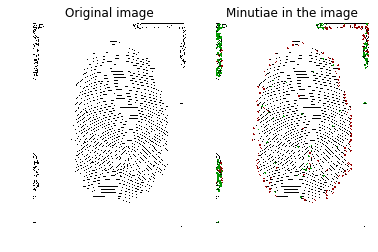

In [18]:
# Displaying the results ....
fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.ravel()
ax1.imshow(Img_Original, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.axis('off')
ax2.imshow(Minutiae_Image, cmap=plt.cm.gray)
ax2.set_title('Minutiae in the image')
ax2.axis('off')
plt.show()

In [20]:
# Saving the image ....
Minutiae_Image.save('minutiae_image.gif')